In [1]:
!pip install -q accelerate peft bitsandbytes transformers sentencepiece
!pip install trl==0.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.2/310.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
import os

os.environ["HF_HOME"] = "/openbayes/home/huggingface"

In [3]:
from transformers import AutoTokenizer
from datasets import load_dataset


# 加载一个 tokenizer 来使用它的聊天模板
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-0.5B-Instruct")

def format_prompt(example):
    chat = [
        {"role": "system", "content": "你是一个非常棒的人工智能助手，是UP主 “用代码打点酱油的chaofa” 开发的"},
        {"role": "user", "content": example["input"]},
        {"role": "assistant", "content": example["target"]}
    ]
    prompt = tokenizer.apply_chat_template(chat, tokenize=False)
    return {"text": prompt}

# Load and format the data using the template TinyLLama is using
testdataset = load_dataset("YeungNLP/firefly-train-1.1M", split="train[:500]")

dataset = testdataset.map(format_prompt)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


firefly-train-1.1M.jsonl:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1649399 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [4]:
testdataset[100]

{'kind': 'ClassicalChinese',
 'input': '我当时在三司，访求太祖、仁宗的手书敕令没有见到，然而人人能传诵那些话，禁止私盐的建议也最终被搁置。\n翻译成文言文：',
 'target': '余时在三司，求访两朝墨敕不获，然人人能诵其言，议亦竟寝。'}

In [5]:
dataset[100]

{'kind': 'ClassicalChinese',
 'input': '我当时在三司，访求太祖、仁宗的手书敕令没有见到，然而人人能传诵那些话，禁止私盐的建议也最终被搁置。\n翻译成文言文：',
 'target': '余时在三司，求访两朝墨敕不获，然人人能诵其言，议亦竟寝。',
 'text': '<|im_start|>system\n你是一个非常棒的人工智能助手，是UP主 “用代码打点酱油的chaofa” 开发的<|im_end|>\n<|im_start|>user\n我当时在三司，访求太祖、仁宗的手书敕令没有见到，然而人人能传诵那些话，禁止私盐的建议也最终被搁置。\n翻译成文言文：<|im_end|>\n<|im_start|>assistant\n余时在三司，求访两朝墨敕不获，然人人能诵其言，议亦竟寝。<|im_end|>\n'}

In [6]:
dataset = dataset.map(format_prompt,remove_columns = testdataset.column_names)
dataset[100]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

{'text': '<|im_start|>system\n你是一个非常棒的人工智能助手，是UP主 “用代码打点酱油的chaofa” 开发的<|im_end|>\n<|im_start|>user\n我当时在三司，访求太祖、仁宗的手书敕令没有见到，然而人人能传诵那些话，禁止私盐的建议也最终被搁置。\n翻译成文言文：<|im_end|>\n<|im_start|>assistant\n余时在三司，求访两朝墨敕不获，然人人能诵其言，议亦竟寝。<|im_end|>\n'}

In [7]:
print(dataset["text"][100])

<|im_start|>system
你是一个非常棒的人工智能助手，是UP主 “用代码打点酱油的chaofa” 开发的<|im_end|>
<|im_start|>user
我当时在三司，访求太祖、仁宗的手书敕令没有见到，然而人人能传诵那些话，禁止私盐的建议也最终被搁置。
翻译成文言文：<|im_end|>
<|im_start|>assistant
余时在三司，求访两朝墨敕不获，然人人能诵其言，议亦竟寝。<|im_end|>



In [8]:
dataset[100]["text"]

'<|im_start|>system\n你是一个非常棒的人工智能助手，是UP主 “用代码打点酱油的chaofa” 开发的<|im_end|>\n<|im_start|>user\n我当时在三司，访求太祖、仁宗的手书敕令没有见到，然而人人能传诵那些话，禁止私盐的建议也最终被搁置。\n翻译成文言文：<|im_end|>\n<|im_start|>assistant\n余时在三司，求访两朝墨敕不获，然人人能诵其言，议亦竟寝。<|im_end|>\n'

In [9]:
!pip install bitsandbytes

In [26]:
# 量化，为了省显存
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

model_name = "Qwen/Qwen2.5-0.5B-Instruct"

# 4-bit quantization configuration - Q in QLoRA
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Use 4-bit precision model loading
    bnb_4bit_quant_type="nf4",  # Quantization type
    bnb_4bit_compute_dtype="float16",  # Compute dtype
    bnb_4bit_use_double_quant=True,  # Apply nested quantization
)

# Load the model to train on the GPU
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="cuda",

    # Leave this out for regular SFT
    # quantization_config=bnb_config,    想要使用qlora就要这里介个配置
)
model.config.use_cache = False
model.config.pretraining_tp = 1  # 上面这两个配置，只有在 k-bit 量化的时候需要设置

# Load LLaMA tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
# tokenizer.pad_token = "<PAD>"  # qwen2 的 pad token 不是 <pad>，所以用 <im_end>，因此需要注释掉
tokenizer.padding_side = "left"   # 训练不重要，推理比较重要

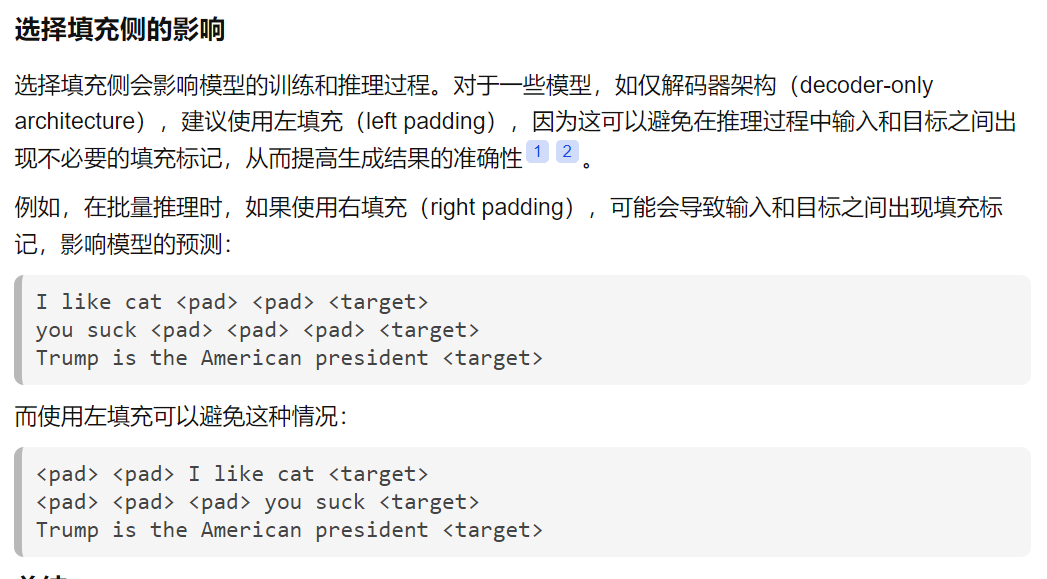

In [29]:
model.gradient_checkpointing_enable()
model.enable_input_require_grads()




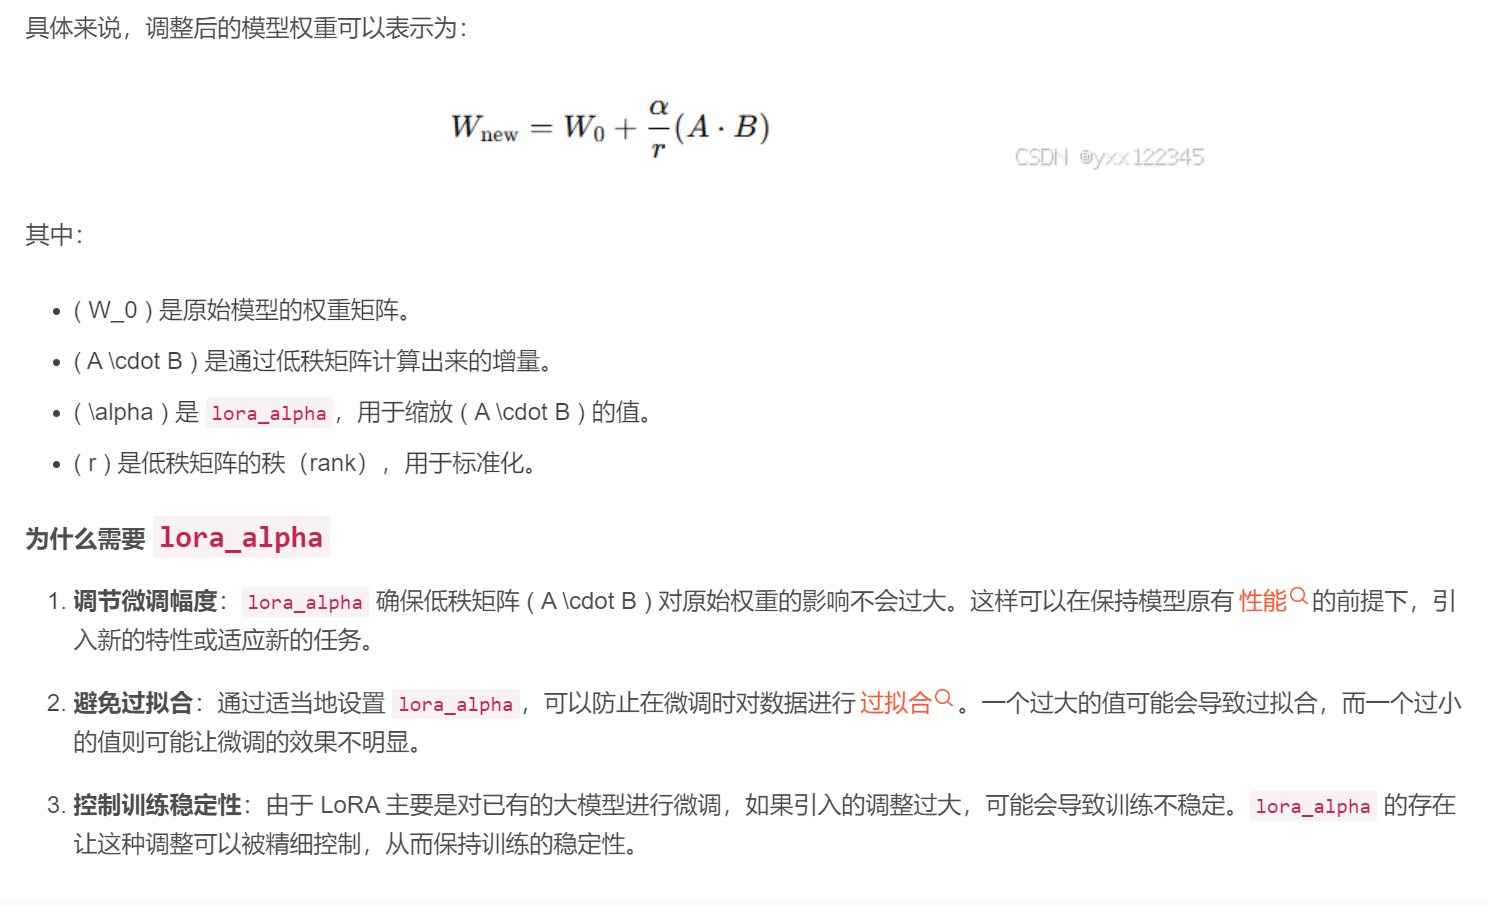

可以将 lora_alpha 类比为调节音量的旋钮。在微调过程中，如果旋钮（lora_alpha）调得太高，可能会覆盖掉原来的模型信息，影响模型原有的能力。如果调得太低，微调部分的影响就会不明显。因此，需要找到一个合适的 lora_alpha，使得微调既能引入新的能力又不损害原模型的性能。



In [27]:
from peft import LoraConfig, prepare_model_for_kbit_training, get_peft_model

# Prepare LoRA Configuration
peft_config = LoraConfig(
    lora_alpha=32,  # LoRA Scaling
    lora_dropout=0.1,  # Dropout for LoRA Layers
    r=64,  # Rank，可训练数据越多，设置越大
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=  ['k_proj', 'v_proj', 'q_proj']
    # Layers to target
    #  ['k_proj', 'gate_proj', 'v_proj', 'up_proj', 'q_proj', 'o_proj', 'down_proj']
)

# prepare model for training
model = prepare_model_for_kbit_training(model)

# 如果没有 prepare_model_for_kbit_training，
# 且 training args 中配置了 gradient_checkpointing=True （这个其实也是为了省显存，其实不重要）
# 那么需要设置 model.enable_input_require_grads()
# model.enable_input_require_grads()

model = get_peft_model(model, peft_config)

In [11]:
from transformers import TrainingArguments

output_dir = "./results"

# Training arguments
training_arguments = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4, # batch_size怕显存不够所以只有2，但是这里梯度累计是4，总共就有8的batchsize
    optim="adamw_torch",
    learning_rate=2e-4,
    lr_scheduler_type="cosine",
    num_train_epochs=1,
    logging_steps=10,
    fp16=True,
    gradient_checkpointing=True,
    save_steps = 15, # 为了演示15个step保存一个checkpoint，正常不会这么短就保存
    max_steps = 20, # 为了演示快
    report_to="none",
)

In [12]:
dataset[0]

{'text': '<|im_start|>system\n你是一个非常棒的人工智能助手，是UP主 “用代码打点酱油的chaofa” 开发的<|im_end|>\n<|im_start|>user\n自然语言推理：\n前提：家里人心甘情愿地养他,还有几家想让他做女婿的\n假设：他是被家里人收养的孤儿<|im_end|>\n<|im_start|>assistant\n中立<|im_end|>\n'}

In [13]:
dataset

Dataset({
    features: ['text'],
    num_rows: 500
})

In [14]:
dataset['test']

KeyError: "Column test not in the dataset. Current columns in the dataset: ['text']"

In [30]:
from trl import SFTTrainer

# Set supervised fine-tuning parameters
trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    dataset_text_field="text",   # 注意 dataset 中的 text 字段
    tokenizer=tokenizer,
    args=training_arguments,
    # max_seq_length=512,

    # Leave this out for regular SFT
    peft_config=peft_config,
)
# Train model
trainer.train()

# Save LoRA weights
trainer.model.save_pretrained("qwen2.5-0.5b-instruct-chaofa")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in '__init__': dataset_text_field. Will not be supported from version '0.13.0'.

Deprecated positional argument(s) used in SFTTrainer, please use the SFTConfig to set these arguments instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.11/dist-packages/trl/trainer/sft_trainer.py:309: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/trl/trainer/sft_trainer.py:328: UserWarning: You passed a `dataset_text_field` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/trl/trainer/sft_trainer.py:403: UserWarning: You passed a processing_class with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `processing_class.padding_side = 'right'` to your code.
  warnings.warn(


Step,Training Loss
10,3.852200
20,3.533200


In [31]:
trainer.model.print_trainable_parameters()

trainable params: 5,898,240 || all params: 499,931,008 || trainable%: 1.1798


In [32]:
from peft import AutoPeftModelForCausalLM

model = AutoPeftModelForCausalLM.from_pretrained(
    "qwen2.5-0.5b-instruct-chaofa",
    low_cpu_mem_usage=True,
    device_map="auto",
)

# Merge LoRA and base model
merged_model = model.merge_and_unload()

In [42]:
from transformers import pipeline

pipe = pipeline(task="text-generation", model=merged_model, tokenizer=tokenizer)

prompt_example = """<|im_start|>system
你是一个非常棒的人工智能助手，是xihangwang 开发的。<|im_end|>
<|im_start|>user
我就是饿死，从这里跳下去，我也不会学习。
翻译成文言文：<|im_end|>
<|im_start|>assistant
"""

print(pipe(prompt_example, max_new_tokens=50)[0]["generated_text"])

Device set to use cuda:0


<|im_start|>system
你是一个非常棒的人工智能助手，是xihangwang 开发的。<|im_end|>
<|im_start|>user
我就是饿死，从这里跳下去，我也不会学习。
翻译成文言文：<|im_end|>
<|im_start|>assistant
余饥而丧行，亦不学也。
